In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# Regressão Linear Simples

https://realpython.com/linear-regression-in-python/

In [2]:
from sklearn.linear_model import LinearRegression

## Dados

In [3]:
dados = pd.read_csv("dados/income_data.csv", index_col=0)

In [4]:
dados

income  happiness
1    3.862647   2.314489
2    4.979381   3.433490
3    4.923957   4.599373
4    3.214372   2.791114
5    7.196409   5.596398
..        ...        ...
494  5.249209   4.568705
495  3.471799   2.535002
496  6.087610   4.397451
497  3.440847   2.070664
498  4.530545   3.710193

[498 rows x 2 columns]

In [5]:
X = dados["income"]
Y = dados["happiness"]

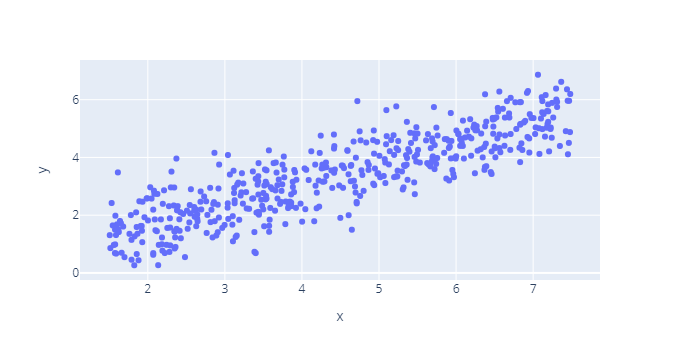

In [6]:
px.scatter(x=X, y=Y)

## Modelo

In [7]:
X_coluna = X.values.reshape((-1, 1))

In [8]:
model = LinearRegression()
model_fit = model.fit(X_coluna, Y)

In [9]:
print("Coeficiente de Determinação:", model.score(X_coluna, Y))

Coeficiente de Determinação: 0.7493217544857413


In [10]:
model.coef_

array([0.71382551])

In [11]:
model.intercept_

0.20427039620417586

In [12]:
print("y =", model.coef_[0], "* x +", model.intercept_)

y = 0.7138255122802077 * x + 0.20427039620417586


In [13]:
Y_pred = X * model.coef_[0] + model.intercept_

In [14]:
fig1 = px.scatter(x=X, y=Y)
fig2 = px.line(x=X, y=Y_pred, color_discrete_sequence=["red"])

all_fig = go.Figure(data=fig1.data + fig2.data, layout = fig1.layout)

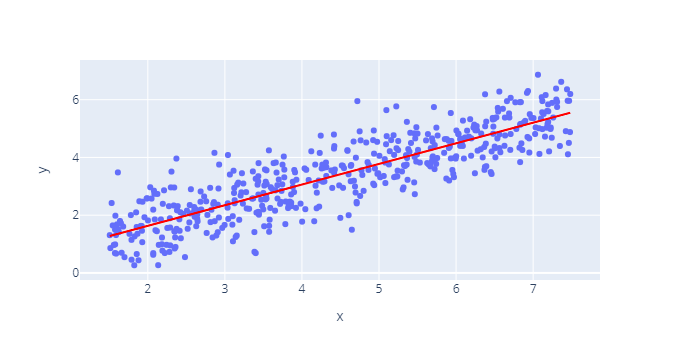

In [15]:
all_fig

## Método dos Mínimos Quadrados

Se estivermos predizendo a reta $Y' = a.x + b$

Determinaremos a curva com base em uma função de custo que mede a distância entre a reta predita e os pontos reais, chamada de mínimos quadrados. Sendo Y a função real e Y' a função predita, dizemos que:

$E = \sum_{i=1}^{n}(Y_i - Y_i')^2$

Que é a distância quadrada entre cada um dos $n$ pontos e a reta predita.

Nosso objetivo será minimizar esse custo, o que podemos usar derivadas para descobrir.

Temos que $Y' = a.x + b$

Então para obter os valores de a e b que minimizem o custo E, derivamos E em relação aos valores e igualamos a zero.

$ \frac{\partial{E}}{\partial{a}} = 0 $

$ \frac{\partial{E}}{\partial{b}} = 0 $

Com a expansão das derivadas obtemos um conjunto de equações que devem ser resolvidas em conjunto e encontramos:

$ a = \frac{\bar{xy}-\bar{x}.\bar{y}}{\bar{x^2}-\bar{x}^2} $

$ b = \frac{\bar{x^2}.\bar{y}-\bar{x}.\bar{xy}}{\bar{x^2}-\bar{x}^2} $

# Regressão Linear Logarítmica

Será que conseguimos modelar com $y = e^x$?

Podemos fazer $log(y) = x$

In [16]:
dados = pd.read_csv("dados/s&p_historical.csv")

In [17]:
dados = dados.reindex(index=dados.index[::-1])

In [18]:
Y = dados["Close*"]
X = np.array(range(len(Y)))

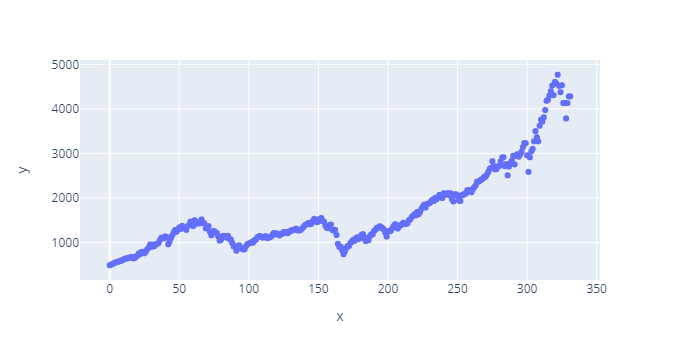

In [19]:
px.scatter(x=X, y=Y)

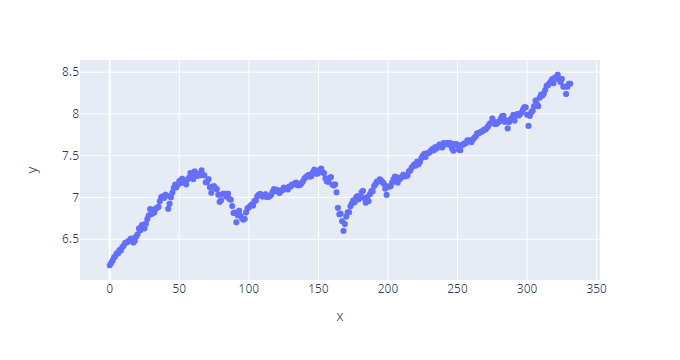

In [20]:
px.scatter(x=X, y=np.log(Y))

In [21]:
# Transformação Logaritmica
Y = np.log(Y)

## Modelo

In [22]:
X = np.array(X)
X_coluna = X.reshape((-1,1))

In [23]:
model = LinearRegression()
model_fit = model.fit(X_coluna, Y)

In [24]:
print("Coeficiente de Determinação:", model.score(X_coluna, Y))

Coeficiente de Determinação: 0.7824048929394224


In [25]:
print("y =", model.coef_[0], "* x +", model.intercept_)

y = 0.004599952518541015 * x + 6.53892635357119


In [26]:
X_pred = np.array(range(1000))

In [27]:
Y_pred = X_pred * model.coef_[0] + model.intercept_

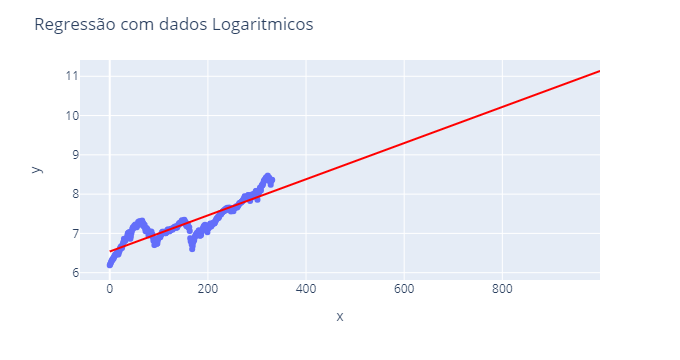

In [28]:
fig1 = px.scatter(x=X, y=Y)
fig2 = px.line(x=X_pred, y=Y_pred, color_discrete_sequence=["red"])

all_fig = go.Figure(data=fig1.data + fig2.data, layout = fig1.layout, layout_title_text="Regressão com dados Logaritmicos")

all_fig

In [29]:
# Retornando para os dados Não-Logaritmicos
Y_pred = np.exp(Y_pred)
Y = np.exp(Y)

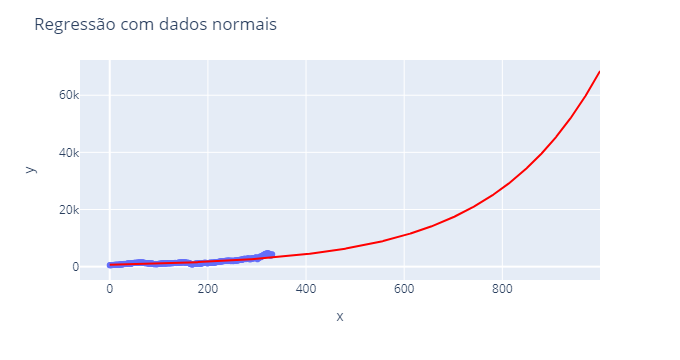

In [30]:
fig1 = px.scatter(x=X, y=Y)
fig2 = px.line(x=X_pred, y=Y_pred, color_discrete_sequence=["red"])

all_fig = go.Figure(data=fig1.data + fig2.data, layout = fig1.layout, layout_title_text="Regressão com dados normais")

all_fig

# Regressão Linear Multivariada

$Y' = a_1.x_1 + a_2.x_2 + ... + b$

In [31]:
dados = pd.read_csv("dados/winequality-red.csv", sep=";")

In [32]:
dados

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

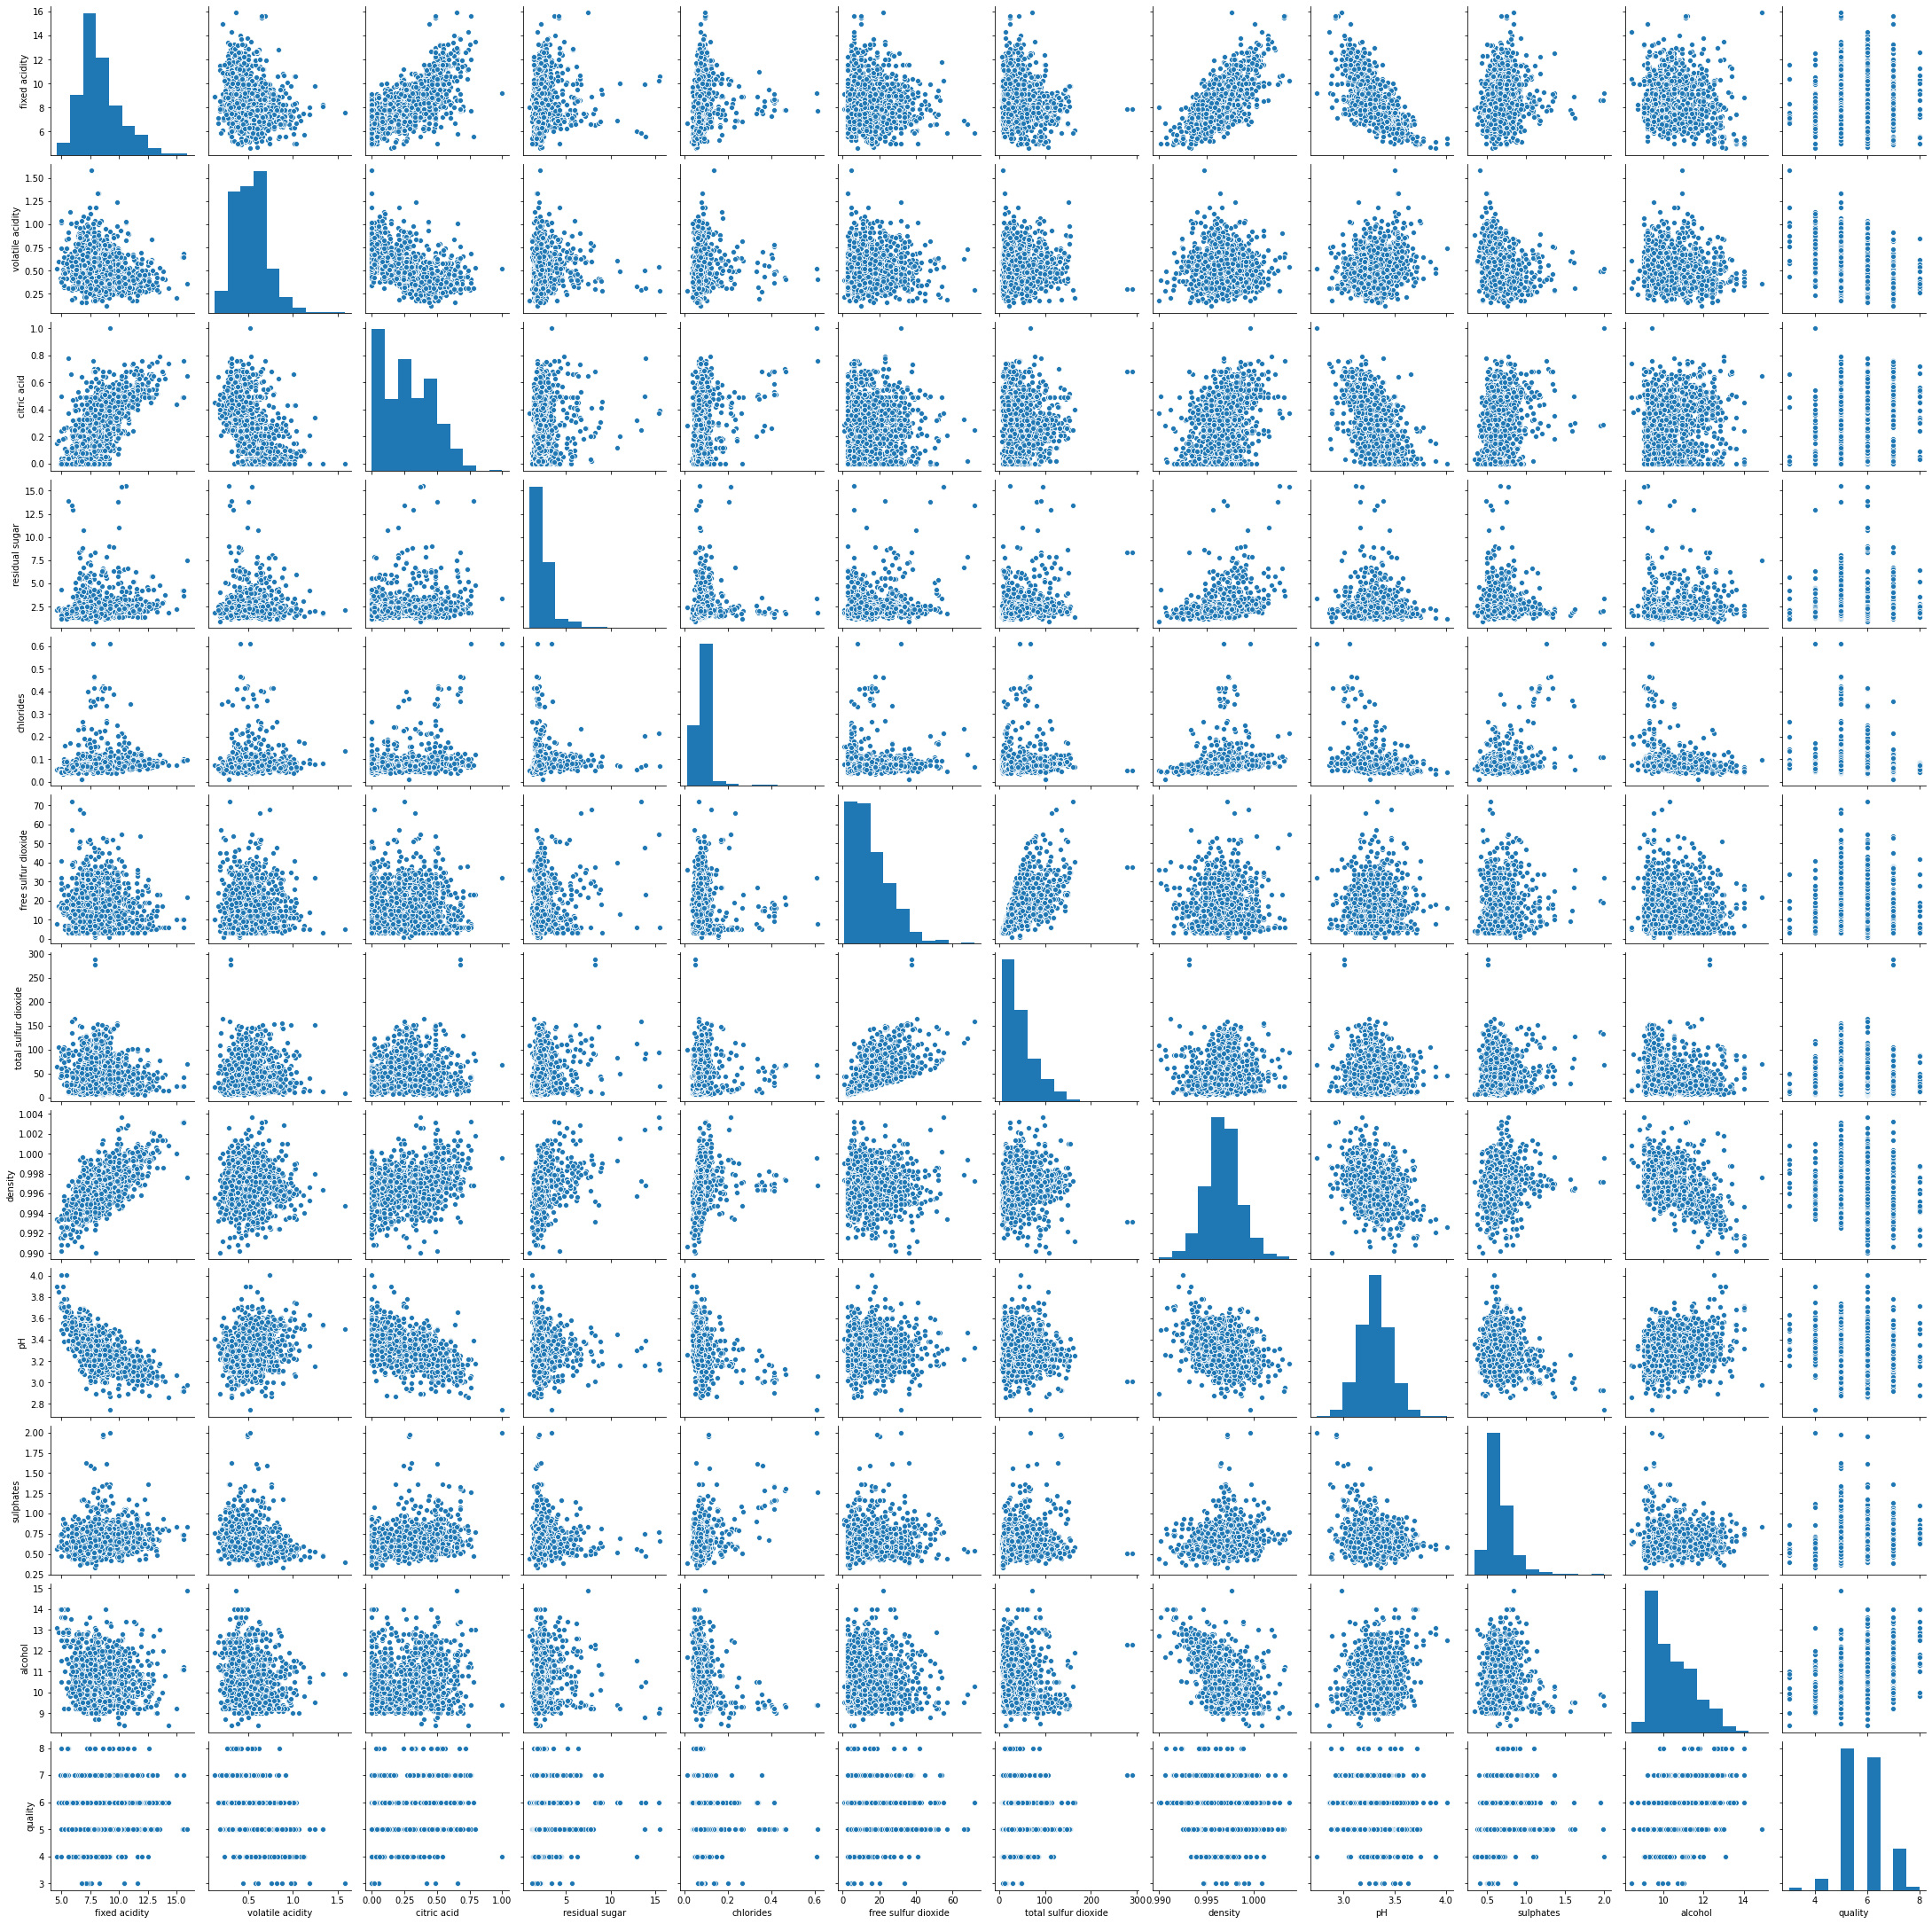

In [33]:
sns.pairplot(dados)

In [34]:
X = dados.iloc[:, :-1].values
Y = dados["quality"].values

In [35]:
X.shape

(1599, 11)

In [36]:
Y.shape

(1599,)

## Modelo

In [37]:
model = LinearRegression()
model_fit = model.fit(X, Y)

In [38]:
print("Coeficiente de Determinação:", model.score(X, Y))

Coeficiente de Determinação: 0.36055170303868855


In [39]:
model.coef_

array([ 2.49905527e-02, -1.08359026e+00, -1.82563948e-01,  1.63312698e-02,
       -1.87422516e+00,  4.36133331e-03, -3.26457970e-03, -1.78811638e+01,
       -4.13653144e-01,  9.16334413e-01,  2.76197699e-01])

In [40]:
model.intercept_

21.96520844945198

# Regressão Linear Polinomial

Será que conseguimos modelar com $y' = a*x^2 + b*x + c$?

Podemos fazer um pré-processamento nos nossos dados pra transformar $x$ em $x_1$, $x^2$ em $x_2$

$y' = a * x_2 + b * x_1 + c$

## Dados

Vamos criar os dados dessa vez usando uma função quadrática e ver se conseguimos obter uma predição semelhante.

In [41]:
X = np.array(range(-20, 50))

In [42]:
a = 10
b = -5
c = -13

Y = a * (X**2) + b * X + c

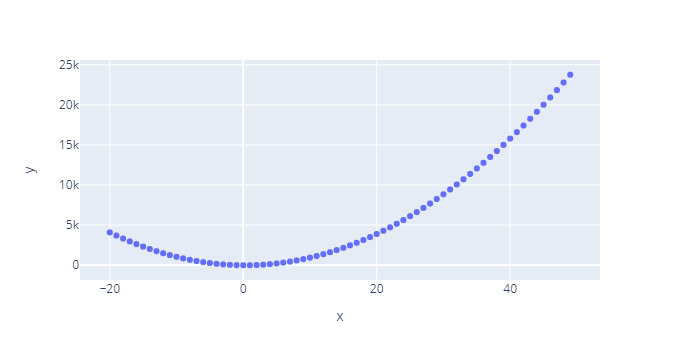

In [43]:
px.scatter(x=X, y=Y)

Para não ficar tão certa a curva, vamos adicionar uma aleatoriedade pequena.

In [44]:
var = np.random.rand(len(Y)) * 10000 - 2500

In [45]:
Y = Y + var

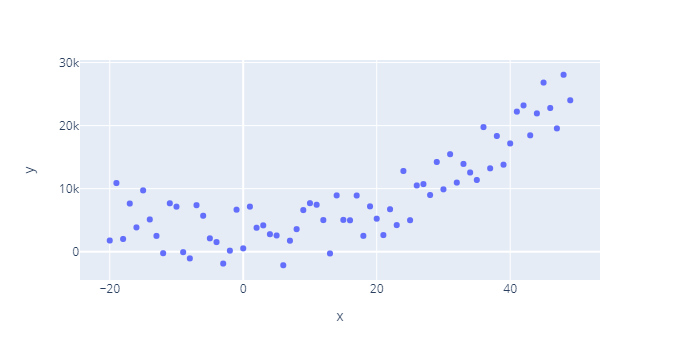

In [46]:
px.scatter(x=X, y=Y)

Devido à não linearidade do $x^2$ não conseguimos usar a regressão linear simples. Precisaremos realizar uma transformação para aplicar a regressão linear. 

Devido à constância do $x^2$ podemos simplesmente processar o X com todas as potências necessárias previamente, antes de passar pelo regressor. Dessa maneira, transformamos o valor de $x^2$ em uma sequência linear de valores $x_2$.
Nosso $x$ padrão chamaremos de $x_1$.

In [47]:
X_1 = X
X_2 = X**2

In [48]:
pd.DataFrame({'x_1': X_1, 'x_2': X_2}).head()

x_1  x_2
0  -20  400
1  -19  361
2  -18  324
3  -17  289
4  -16  256

In [49]:
X_polinomial = np.concatenate( (X_1.reshape((-1,1)), X_2.reshape((-1,1))), axis=1 )

## Modelo

In [50]:
model = LinearRegression()
model_fit = model.fit(X_polinomial, Y)

In [51]:
print("Coeficiente de Determinação:", model.score(X_polinomial, Y))

Coeficiente de Determinação: 0.8298545625004667


In [52]:
model.coef_

array([6.71814048, 9.51130091])

In [53]:
model.intercept_

2755.2586805651936

In [54]:
print(f"Modelo predito: {model.coef_[1]} * x^2 + {model.coef_[0]} * x + {model.intercept_}")

Modelo predito: 9.511300906071224 * x^2 + 6.718140481036835 * x + 2755.2586805651936


In [55]:
Y_pred = model.coef_[1] * (X**2) + model.coef_[0] * X + model.intercept_

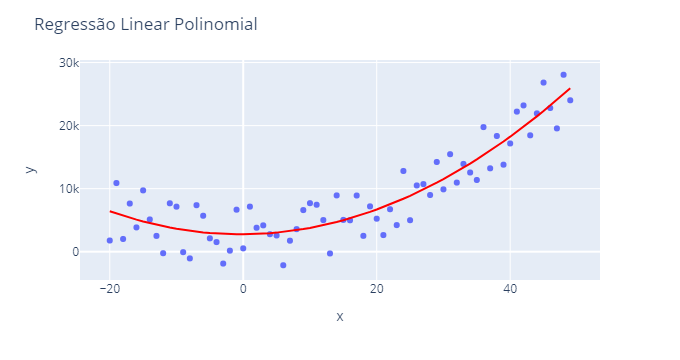

In [56]:
fig1 = px.scatter(x=X, y=Y)
fig2 = px.line(x=X, y=Y_pred, color_discrete_sequence=["red"])

all_fig = go.Figure(data=fig1.data + fig2.data, layout = fig1.layout, layout_title_text="Regressão Linear Polinomial")

all_fig

## Utilizando para Predição

Podemos utilizar as constantes obtidas agora para prever dados fora do intervalo, comox x=100

In [57]:
x = 80
y = model.coef_[1] * (x**2) + model.coef_[0] * x + model.intercept_

In [58]:
y

64165.03571790397

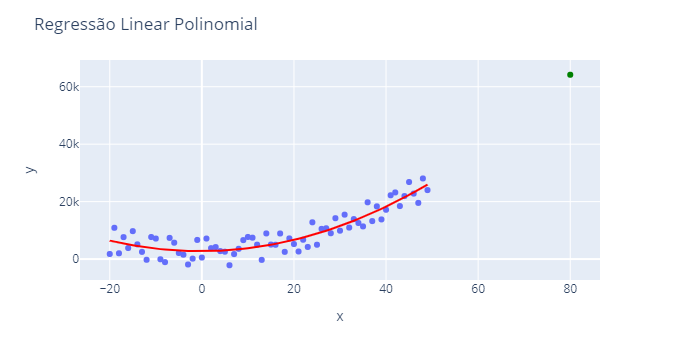

In [59]:
fig1 = px.scatter(x=X, y=Y)
fig2 = px.line(x=X, y=Y_pred, color_discrete_sequence=["red"])
fig3 = px.scatter(x=[x], y=[y], color_discrete_sequence=["green"])

all_fig = go.Figure(
    data=fig1.data + fig2.data + fig3.data, 
    layout = fig1.layout, 
    layout_title_text="Regressão Linear Polinomial"
)

all_fig